In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
## substitute string with key column to identify each document
key_id = 'locationAccordingTo'

In [3]:
## open data file
with open(os.path.join('dataset_metadata.csv'), 'r') as f:
    df = pd.read_csv(f)
    exercise = df

## treat data in listed column(s) as numeric
numeric_columns = ['dateIdentified'] 
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

,catalogNumber,sourceCategory,dateIdentified,database,language,availability,PDF,Corpus_PDF_references,References Endnote,associatedReferences,locationAccordingTo
0,NS0897,Literature,1895.0,archive.org,German,free_online,PDF,1895_Henchel_review_psyllids,Henchel GA (1895),https://ia600305.us.archive.org/2/items/bub_gb...,Henchel GA (1895) Die Schadlichen Forst- Und O...
1,NS1364,Literature,1955.0,BHL,Chinese,free_online,PDF,1955_Pavlovsky_Cacopsylla_pruni_CCCP_Irkurskt,Pavlovsky EN (1955),https://www.biodiversitylibrary.org/page/36567904,Pavlovsky EN (1955) Forest Pest Reference II. ...
2,NS1365,Literature,1955.0,BHL,Chinese,free_online,PDF,1955_Pavlovsky_Cacopsylla_pruni_CCCP_Irkurskt,Pavlovsky EN (1955),https://www.biodiversitylibrary.org/page/36567904,Pavlovsky EN (1955) Forest Pest Reference II. ...
3,NS1366,Literature,1955.0,BHL,Chinese,free_online,PDF,1955_Pavlovsky_Cacopsylla_pruni_CCCP_Irkurskt,Pavlovsky EN (1955),https://www.biodiversitylibrary.org/page/36567904,Pavlovsky EN (1955) Forest Pest Reference II. ...
4,NS1122,Literature,1837.0,BHL,English,free_online,PDF,1837_Curtis_Cacopsylla_pruni_Britain_page_220,Curtis J (1837),https://doi.org/10.5962/bhl.title.46860,Curtis J (1837) A guide to an arrangement of B...


In [4]:
from tools.visual import plot
# TODO associated database associatedreference
save_dir = os.path.join(os.getcwd(), 'imgs')

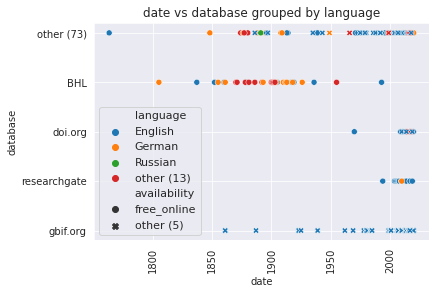

In [5]:
x = 'dateIdentified'
y = 'database'
hue = 'language'
style='availability'

plot(x=x, y=y, hue=hue, style=style, data=df,
    type='scatter',
    split={hue:4,style:2,y:5}, #slice_top={y:5},
    legend_position='lower left',
    drop_doubles=[key_id],
    xlabel='date', ylabel='database', huelabel='',
    sort_alpha=[hue],
    save_dir = save_dir,
    )

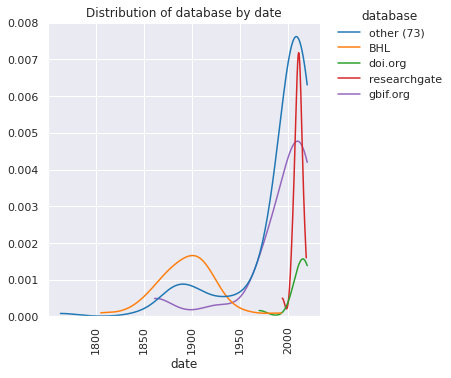

In [6]:
x = 'dateIdentified'
hue = 'database'

plot(x=x, hue=hue, data=df,
    type='dist',
    split={hue:5},
    legend_position=None, drop_na=[hue],
    drop_doubles=[key_id],
    xlabel='date', ylabel='', huelabel='database',
    save_dir = save_dir,
    )

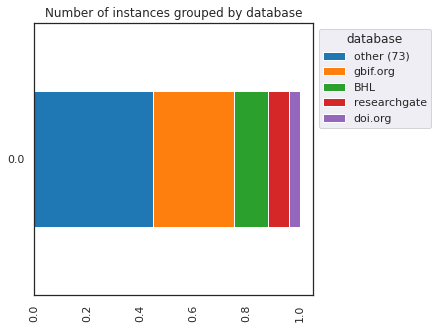

In [7]:
hue = 'database'
x='PDF'

plot(hue=hue, data=df,
    type='perc',
    split={hue:5},
    drop_doubles=[key_id], drop_na=[hue],
    legend_position='out',
    save_dir = save_dir,
    )

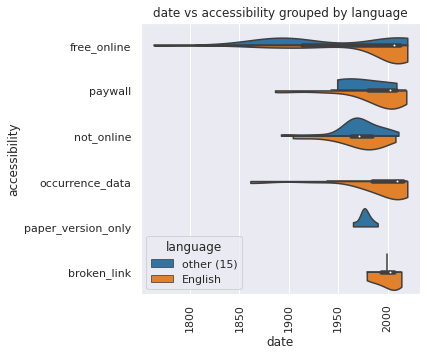

In [8]:
x = 'dateIdentified'
y = 'availability'
hue = 'language'

plot(x=x, y=y, hue=hue, data=df,
    type='violin',
    split={hue:2},
    drop_doubles=[key_id], drop_na=[x],
    xlabel='date', ylabel='accessibility', huelabel='language',
    save_dir = save_dir,
    )

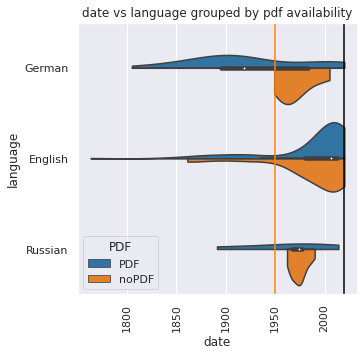

In [9]:
x = 'dateIdentified'
hue = 'PDF'
y = 'language'
palette = sns.color_palette('tab10',n_colors=2)

plot(x=x, y=y, hue=hue, data=df,
    type='violin',
    legend_position='lower left',
    slice_top={y:3},
    drop_doubles=[key_id], drop_na=[x],
    xlabel='date', ylabel='language', huelabel='pdf availability',
    vlines=[
        {'x':1950,'ymin':0,'ymax':1,'gid':'copyright', 'c':palette[1]},
        {'x':2020,'ymin':0,'ymax':1,'gid':'last publication', 'c':'black'}
        ],
    save_dir = save_dir,
    )
# German: copyright from 1950
# English: a lot of info in unvailable documents

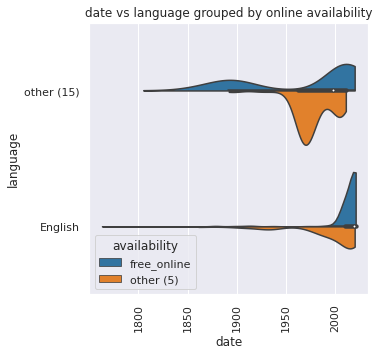

In [10]:
x = 'dateIdentified'
hue = 'availability'
y = 'language'

plot(x=x, y=y, hue=hue, data=df,
    type='violin',
    legend_position='lower left',
    split={hue:2,y:2}, 
    xlabel='date', ylabel='language', huelabel='online availability',
    save_dir = save_dir,
    )